# Unit 11. 신경망 모델에서 옵티마이저 사용법
### - 이진 분류 - 유방암 예측 사례

In [1]:
import numpy as np
import matplotlib.pyplot as plt

- 데이터 준비

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cancer_std = scaler.fit_transform(cancer.data)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2022
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

### Case 1. Adam optimizer

- 모델 정의

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
model = Sequential([
    Dense(100, input_shape=(30,), activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 24)                2424      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


- 모델 설정

- Adam 하이퍼 파라메터
<pre>
learning_rate: 0보다 크거나 같은 float 값. 학습률.
beta_1: 0보다 크고 1보다 작은 float 값. 일반적으로 1에 가깝게 설정됩니다.
beta_2: 0보다 크고 1보다 작은 float 값. 일반적으로 1에 가깝게 설정됩니다.
epsilon: 0보다 크거나 같은 float형 fuzz factor. None인 경우 K.epsilon()이 사용됩니다.
decay: 0보다 크거나 같은 float 값. 업데이트마다 적용되는 학습률의 감소율입니다.
amsgrad: 불리언. Adam의 변형인 AMSGrad의 적용 여부를 설정합니다
</pre>

In [7]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [8]:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

- 모델 학습

In [9]:
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=100, batch_size=50)

Epoch 1/100
8/8 [==============================] - 1s 31ms/step - loss: 0.6569 - accuracy: 0.7033 - val_loss: 0.4533 - val_accuracy: 0.9011
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3882 - accuracy: 0.9176 - val_loss: 0.3108 - val_accuracy: 0.8901
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2707 - accuracy: 0.9341 - val_loss: 0.2369 - val_accuracy: 0.8901
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.2069 - accuracy: 0.9368 - val_loss: 0.1941 - val_accuracy: 0.9011
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1662 - accuracy: 0.9505 - val_loss: 0.1666 - val_accuracy: 0.9341
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1395 - accuracy: 0.9615 - val_loss: 0.1484 - val_accuracy: 0.9560
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1223 - accuracy: 0.9643 - val_loss: 0.1362 - val_accuracy: 0.9560
Epoch 8/100
8/8 [=========

- 모델 평가

In [10]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0764 - accuracy: 0.9737


[0.0763702243566513, 0.9736841917037964]

- 훈련과정 시각화

In [11]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
xs = np.arange(1,len(y_acc)+1)        # epoch

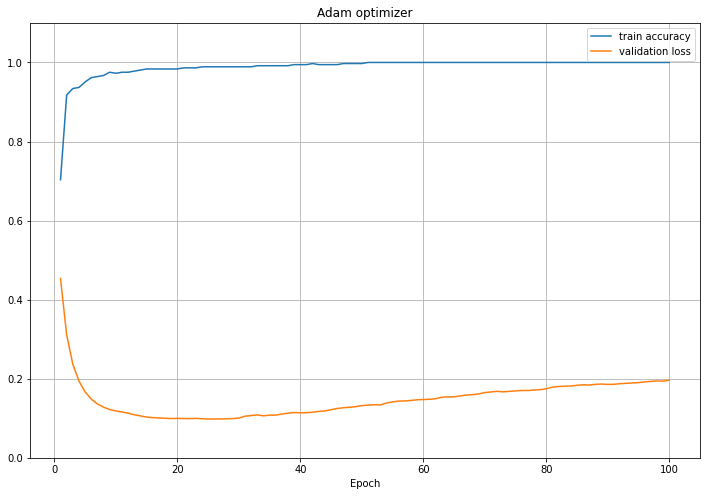

In [12]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,1.1])
plt.xlabel('Epoch')
plt.title('Adam optimizer')
plt.show()

### Case 2. RMSprop optimizer

In [13]:
model2 = Sequential()
model2.add(Dense(100, input_dim=30, activation='relu'))
model2.add(Dense(24, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               3100      
                                                                 
 dense_4 (Dense)             (None, 24)                2424      
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


- RMSprop  하이퍼 파라메터
<pre>
lr: 0보다 크거나 같은 float 값. 학습률.
rho: 0보다 크거나 같은 float 값.
epsilon: 0보다 크거나 같은 float형 fuzz factor. None인 경우 K.epsilon()이 사용됩니다.
decay: 0보다 크거나 같은 float 값. 업데이트마다 적용되는 학습률의 감소율입니다.
</pre>

In [14]:
from tensorflow.keras.optimizers import RMSprop
rmsp = RMSprop(learning_rate=0.001, rho=0.9, epsilon=None, decay=0.0)

In [15]:
model2.compile(optimizer=rmsp, loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history2 = model2.fit(X_train, y_train, validation_split=0.2,
                      epochs=100, batch_size=50)

Epoch 1/100
8/8 [==============================] - 1s 28ms/step - loss: 0.4142 - accuracy: 0.8956 - val_loss: 0.2791 - val_accuracy: 0.9121
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2235 - accuracy: 0.9533 - val_loss: 0.2024 - val_accuracy: 0.9560
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1576 - accuracy: 0.9643 - val_loss: 0.1625 - val_accuracy: 0.9670
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1225 - accuracy: 0.9808 - val_loss: 0.1404 - val_accuracy: 0.9670
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0994 - accuracy: 0.9835 - val_loss: 0.1229 - val_accuracy: 0.9670
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0840 - accuracy: 0.9835 - val_loss: 0.1144 - val_accuracy: 0.9560
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0728 - accuracy: 0.9835 - val_loss: 0.1098 - val_accuracy: 0.9670
Epoch 8/100
8/8 [=========

In [17]:
model2.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.2782 - accuracy: 0.9825


[0.2781769633293152, 0.9824561476707458]

In [18]:
y_acc2 = history2.history['accuracy']
y_vloss2 = history2.history['val_loss']
xs2 = np.arange(1,len(y_acc2)+1)        # epoch

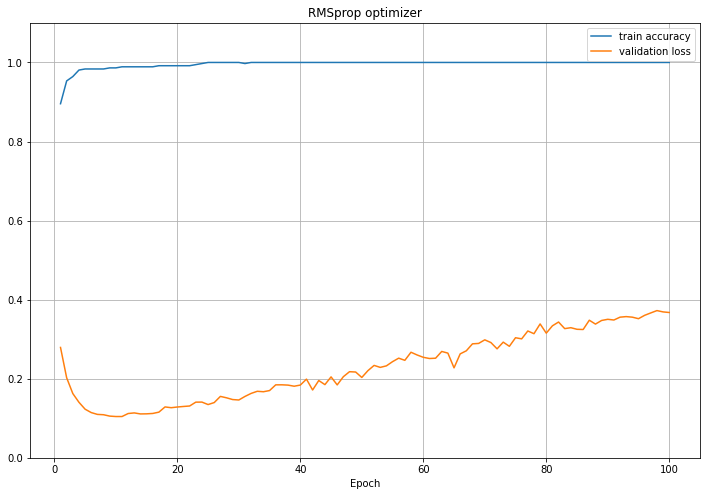

In [19]:
plt.figure(figsize=(12,8))
plt.plot(xs2, y_acc2, label='train accuracy')
plt.plot(xs2, y_vloss2, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,1.1])
plt.xlabel('Epoch')
plt.title('RMSprop optimizer')
plt.show()

- 2가지 옵티마이저 비교

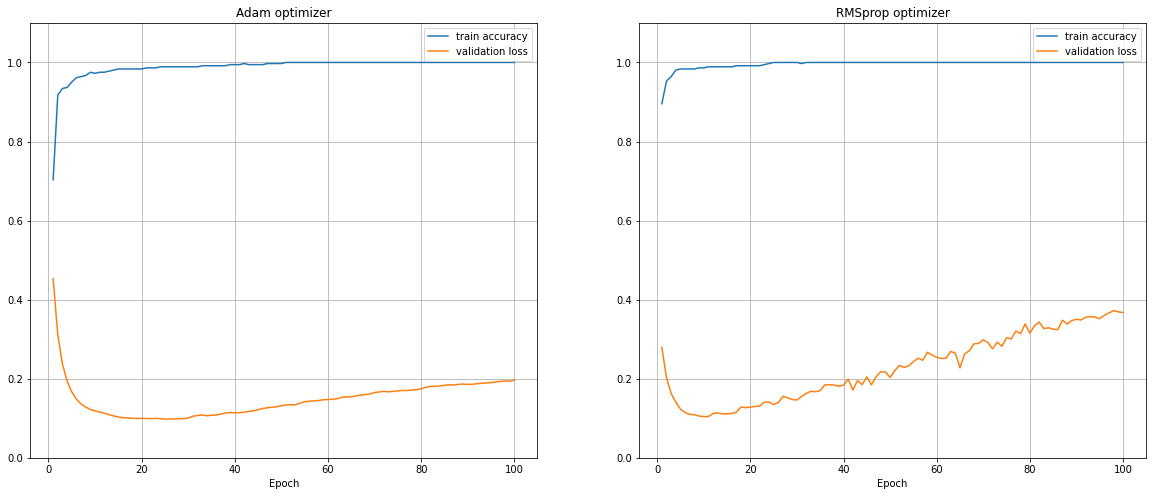

In [20]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,1.1])
plt.xlabel('Epoch')
plt.title('Adam optimizer')

plt.subplot(122)
plt.plot(xs2, y_acc2, label='train accuracy')
plt.plot(xs2, y_vloss2, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,1.1])
plt.xlabel('Epoch')
plt.title('RMSprop optimizer')

plt.show()